# DAML 08 - Principal Component Analysis

Michal Grochmal <michal.grochmal@city.ac.uk>

Let's have a look at PCA in action.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patheffects as PathEffects
import seaborn as sns
sns.set()
from sklearn.decomposition import PCA
from sklearn.datasets import load_digits
from sklearn.datasets import fetch_lfw_people

## Eigenfaces

PCA works by finding eigenvectors for the directions in the data that hold most variance.
Each eigenvector is parallel to each other.  The maximum number of eigenvectors for data
in $N$ dimensions is $N$ but the power of PCA is that we can use less than $N$ eigenvectors
to get a *"good enough"* representation of the data.

When used on faces, and since eigenvectors have been used on faces over the years in many
applications, these eigenvectors are often called *eigenfaces*.  The eigenfaces represent
the biggest directions of variations across a dataset of faces, and are one of the most
common techniques in face recognition.

To get some faces we will use the *Labeled Faces in the Wild* dataset, which contains
thousands of cropped photos to show only the face.  This dataset has been produced
in early 2000s, therefore has mostly people often photographed at that time.

In [2]:
faces = fetch_lfw_people(min_faces_per_person=30)
print(faces.target_names)
faces.images.shape, faces.data.shape

['Alejandro Toledo' 'Alvaro Uribe' 'Andre Agassi' 'Ariel Sharon'
 'Arnold Schwarzenegger' 'Colin Powell' 'David Beckham' 'Donald Rumsfeld'
 'George W Bush' 'Gerhard Schroeder' 'Gloria Macapagal Arroyo'
 'Guillermo Coria' 'Hans Blix' 'Hugo Chavez' 'Jacques Chirac'
 'Jean Chretien' 'Jennifer Capriati' 'John Ashcroft' 'John Negroponte'
 'Junichiro Koizumi' 'Kofi Annan' 'Laura Bush' 'Lleyton Hewitt'
 'Luiz Inacio Lula da Silva' 'Megawati Sukarnoputri' 'Nestor Kirchner'
 'Recep Tayyip Erdogan' 'Roh Moo-hyun' 'Serena Williams'
 'Silvio Berlusconi' 'Tom Ridge' 'Tony Blair' 'Vicente Fox'
 'Vladimir Putin']


((2370, 62, 47), (2370, 2914))

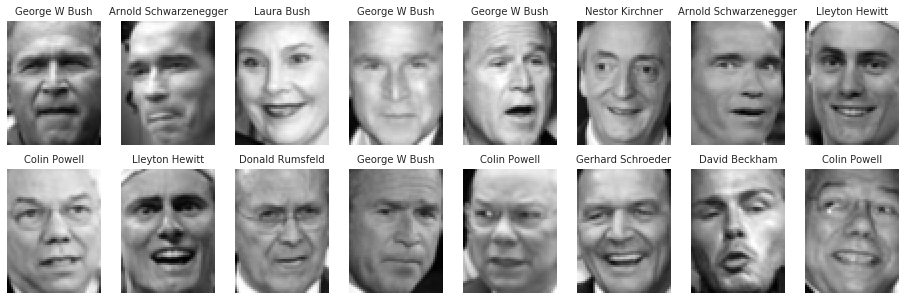

In [3]:
fig, axes = plt.subplots(2, 8, figsize=(16, 5), subplot_kw={'xticks':[], 'yticks':[]})
fig.subplots_adjust(hspace=0.2, wspace=0.2)
for i, ax in enumerate(axes.flat):
    ax.imshow(faces.data[i].reshape(62, 47), cmap='binary_r')
    ax.set_title(faces.target_names[faces.target[i]], fontsize=10)

PCA `components_` are the eigenvector orientation, i.e. the direction of the vector
in the dimensions of the original dataset.  The `explained_variance_` are the vector
magnitudes.

In [4]:
pca = PCA(n_components=120, svd_solver='randomized')
pca.fit(faces.data)
pca.components_, pca.components_.shape, pca.explained_variance_

(array([[ -5.78188617e-03,  -6.47538155e-03,  -7.50266900e-03, ...,
          -7.50294281e-03,  -6.32202486e-03,  -5.40363742e-03],
        [  1.55333811e-02,   1.49046211e-02,   1.50298886e-02, ...,
          -3.53912637e-02,  -3.40576768e-02,  -3.24589089e-02],
        [  4.33868617e-02,   4.44383211e-02,   4.59246077e-02, ...,
           2.25560609e-02,   2.07422674e-02,   1.83290746e-02],
        ..., 
        [ -1.16826398e-02,  -6.55809464e-03,   3.48385284e-03, ...,
           5.51975972e-05,  -4.65698466e-02,  -7.24764764e-02],
        [ -8.62281118e-03,  -6.05564844e-03,  -4.72557824e-03, ...,
           1.51074324e-02,  -6.47635153e-03,  -2.70020943e-02],
        [ -1.83134305e-03,  -1.23150488e-02,  -2.01442149e-02, ...,
          -2.75082346e-02,  -9.84785613e-03,   1.35365073e-02]], dtype=float32),
 (120, 2914),
 array([ 982217.5625    ,  581731.8125    ,  328733.75      ,
         298409.34375   ,  197671.390625  ,  137052.515625  ,
          97544.0625    ,   86715.78125

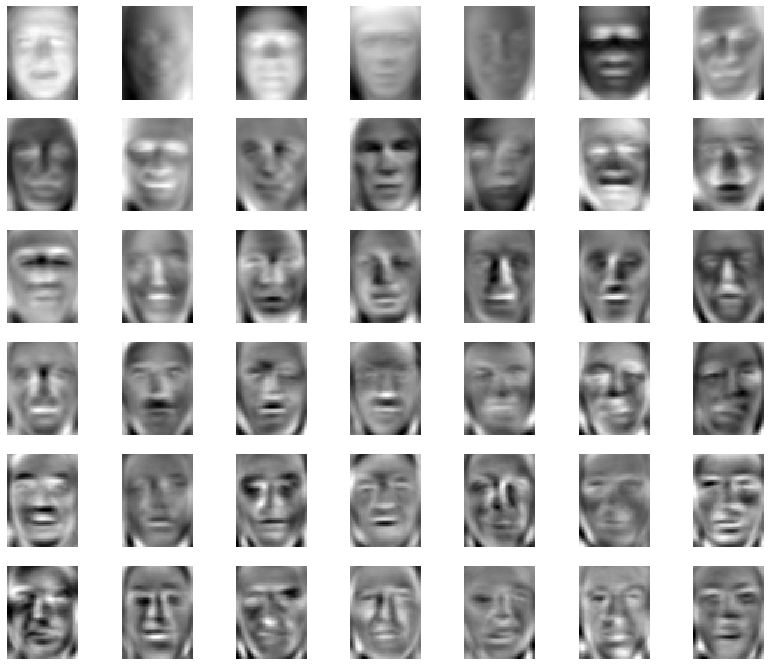

In [5]:
fig, axes = plt.subplots(6, 7, figsize=(14, 12), subplot_kw={'xticks':[], 'yticks':[]})
fig.subplots_adjust(hspace=0.2, wspace=0.2)
for i, ax in enumerate(axes.flat):
    ax.imshow(pca.components_[i].reshape(62, 47), cmap='binary')

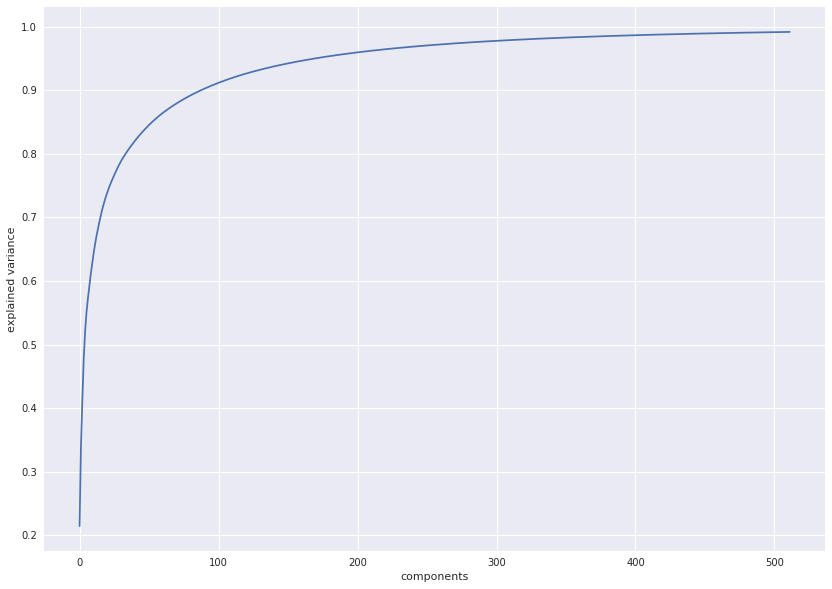

In [6]:
pca = PCA(n_components=512, svd_solver='randomized')  # no need to go to all 2914 dimensions
pca.fit(faces.data)
fig, ax = plt.subplots(figsize=(14, 10))
ax.plot(np.cumsum(pca.explained_variance_ratio_))
ax.set(xlabel='components', ylabel='explained variance');

The `transform` of the PCA technique projects the data into the space defined
by the eigenvectors.  This operation loses some information but since the majority
of the variance is retained the loss is as minimal as possible.  The `inverse_transform`
can throw the projection back into the original dimensions, yet the data loss remains
since we cannot guess that data.

This allows us to visualize how much data was actually lost:

In [7]:
proj = {}
for i in [128, 256]:
    pca = PCA(n_components=i, svd_solver='randomized')
    pca.fit(faces.data)
    reduced = pca.transform(faces.data)
    proj[i] = pca.inverse_transform(reduced)

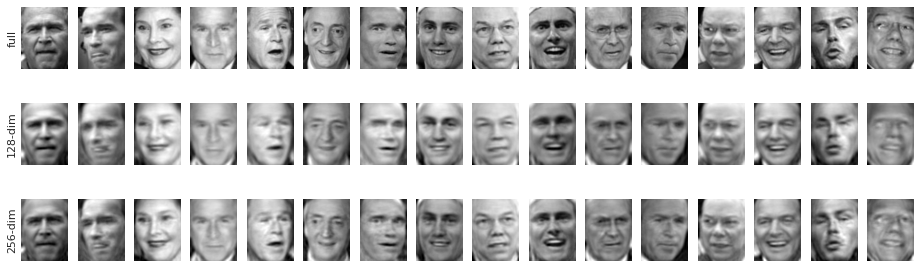

In [8]:
fig, ax = plt.subplots(3, 16, figsize=(16, 5), subplot_kw={'xticks':[], 'yticks':[]})
fig.subplots_adjust(hspace=0.2, wspace=0.2)
for i in range(16):
    ax[0, i].imshow(faces.data[i].reshape(62, 47), cmap='binary_r')
    ax[1, i].imshow(proj[128][i].reshape(62, 47), cmap='binary_r')
    ax[2, i].imshow(proj[256][i].reshape(62, 47), cmap='binary_r')
ax[0, 0].set_ylabel('full')
ax[1, 0].set_ylabel('128-dim');
ax[2, 0].set_ylabel('256-dim');

## Digits

Another dataset of images are the MNIST handwritten digits.
This dataset is often used for algorithm benchmark due to its complexity.

In [9]:
digits = load_digits()
digits.data.shape

(1797, 64)

In [10]:
print(digits['DESCR'])

Optical Recognition of Handwritten Digits Data Set

Notes
-----
Data Set Characteristics:
    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an input matrix of 8x8 where each element is a

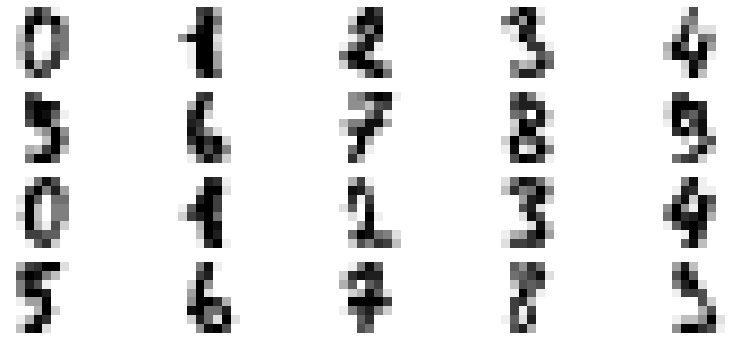

In [11]:
sample = digits.data[:20].reshape(20, 8, 8)
fig, ax = plt.subplots(4, 5, figsize=(14, 6))
for i in range(20):
    ax.flat[i].imshow(sample[i], cmap='binary')
    ax.flat[i].set(xticks=[], yticks=[])

In [12]:
pca = PCA(n_components=2)
proj = pca.fit_transform(digits.data)
digits.data.shape, proj.shape

((1797, 64), (1797, 2))

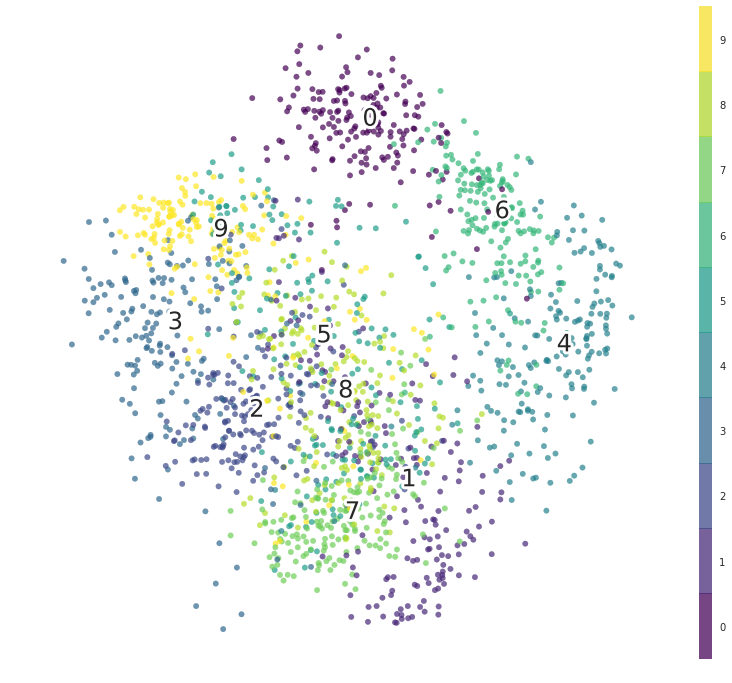

In [13]:
fig, ax = plt.subplots(figsize=(14, 12))
plot = ax.scatter(proj[:, 0], proj[:, 1], s=30, c=digits.target,
                  alpha=0.7, cmap=plt.cm.get_cmap('viridis', 10))
plot.set_clim(-0.5, 9.5)  # make the ticks look right
ax.axis('off')
ticks = np.array(range(10))
fig.colorbar(plot, ax=ax, aspect=50, ticks=ticks)
for i in range(10):
    xtext, ytext = np.median(proj[digits.target == i, :], axis=0)
    txt = ax.text(xtext, ytext, str(i), fontsize=24)
    txt.set_path_effects([
        PathEffects.Stroke(linewidth=6, foreground='white'), PathEffects.Normal()])

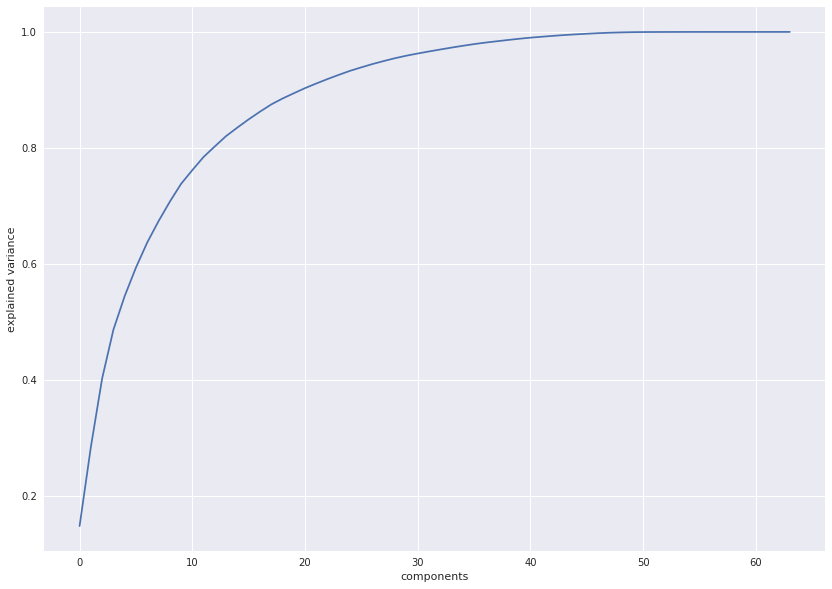

In [14]:
pca = PCA().fit(digits.data)
fig, ax = plt.subplots(figsize=(14, 10))
ax.plot(np.cumsum(pca.explained_variance_ratio_))
ax.set(xlabel='components', ylabel='explained variance');

### Linearity of PCA and manifold techniques

The issue with the digits happens because PCA is a technique that depends on the linearity
of the dimensions it works with.  Relations that are non-linear, e.g. two open spaces means
an 8, one open space means a 6 or a 9, no open spaces within the digit is anything else;
cannot be captured by PCA.

To deal with non-linear relationships manifold techniques were developed.
These techniques are based on maintaining distances between points in the data
instead of maintaining the variance within specific dimensions.
That said, PCA is easy to interpret due to the cumulative variance,
yet it is often difficult to interpret what a manifold technique is doing.
Moreover, there is no definitive measure of whether a manifold technique will
or will not converge for a particular dataset, and manifold techniques are more
sensitive to outliers than PCA.

As a rule of thumb, it is wise to attempt manifold techniques only after attempting
PCA and understanding the shape of the data.  Some manifold techniques include:

-   Multidimensional Scaling (MDS) is the simplest manifold which works by preserving
    (as much as possible) the distances between *all* points in the dataset.

-   Locally Linear Embedding (LLE) works like MDS but only preserves distances within
    a defined number of neighbors, this allows to "unroll" certain relationships.

-   Isomap is similar to LLE in that it uses a neighbor search but then computes
    eigenvectors over the local groups.

-   Spectral Embedding is a stochastic way of building eigenmaps from a graph based
    neighbor search, this makes it similar to LLE.

-   t-distributed Stochastic Neighbor Embedding (t-SNE) may reveal structures at
    different scales since it builds several t-distributions (similar to a bell shape)
    within groups of neighbors and then works with these t-distributions instead
    of the actual data points.